# Supervised Learning - Linear Regression

In [1]:
from sklearn import datasets, metrics, linear_model, model_selection
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# pandas display options for printing dataframes:
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)

In [2]:
diabetes = datasets.load_diabetes(as_frame=True)

In [3]:
diabetes.frame.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [4]:
diabetes.data.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930


In [5]:
diabetes.target.head(3)

0    151.0
1     75.0
2    141.0
Name: target, dtype: float64

In [6]:
X = diabetes.data.values
y = diabetes.target.values
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)
linearRegressionModel = linear_model.LinearRegression()

In [7]:
# real targets and predicted targets scatter plot
def plot(x, yReal, yPredicted, title):
  fig, ax = plt.subplots(figsize=(12.8,7.2), dpi=100)
  ax.scatter(x, yReal,  color='black', label="real")
  ax.scatter(x, yPredicted, marker="x", color='red', label="predicted")

  ax.set_xlim(left=-0.2, right=0.2)
  ax.set_ylim(bottom=0, top=400)
  ax.set_xlabel("Normalized Age")
  ax.set_ylabel("Target")
  ax.legend()
  # Display 'ticks' in x-axis and y-axis
  plt.xticks()
  plt.yticks()
  plt.title(title)
  # Show plot
  plt.show()
  return

In [8]:
# fits the model then predicts and evaluates on both the training and test sets
def run(x_train, x_test, y_train, y_test, model):
  model.fit(x_train, y_train)
  y_predicted = model.predict(x_train)

  print("Training Set Evaluation:")
  print("r2 =", metrics.r2_score(y_train, y_predicted))
  
  plot(x_train[:,:1], y_train, y_predicted, "Training Set Predictions")
  
  y_predicted = model.predict(x_test)
  cor = stats.pearsonr(y_test, y_predicted)
  mse = metrics.mean_squared_error(y_test, y_predicted)
  r2 = metrics.r2_score(y_test, y_predicted)
  
  plot(x_test[:,:1], y_test, y_predicted, "Test Set Predictions")

  print("Test Set Evaluation:")
  print("correlation =", cor)
  print("mean squared error =", mse)
  print("r2 =", r2)
  return

Training Set Evaluation:
r2 = 0.03517202432354194


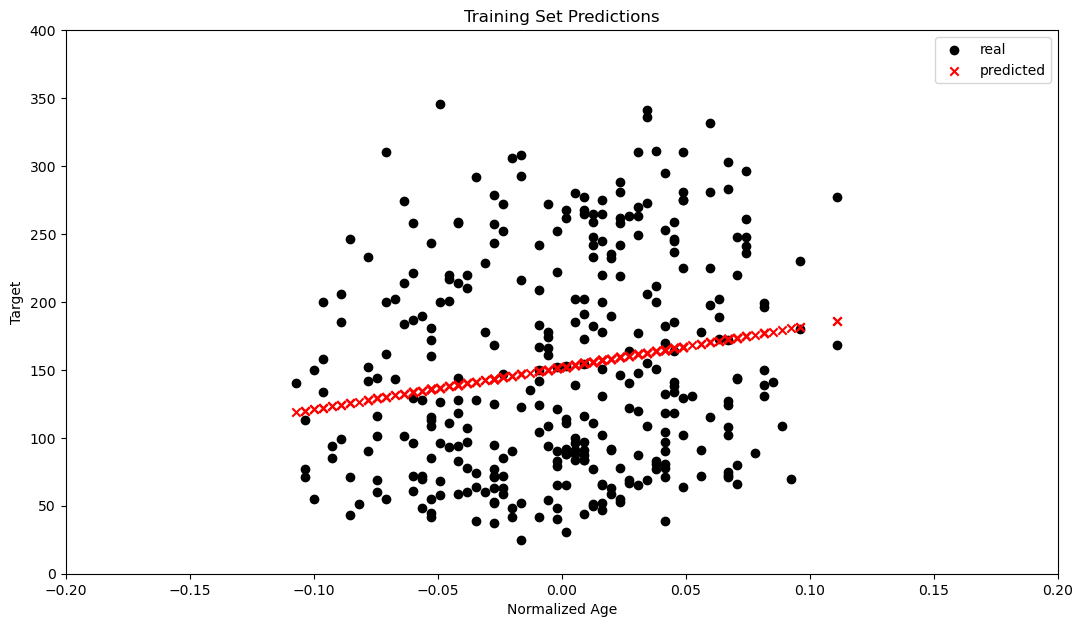

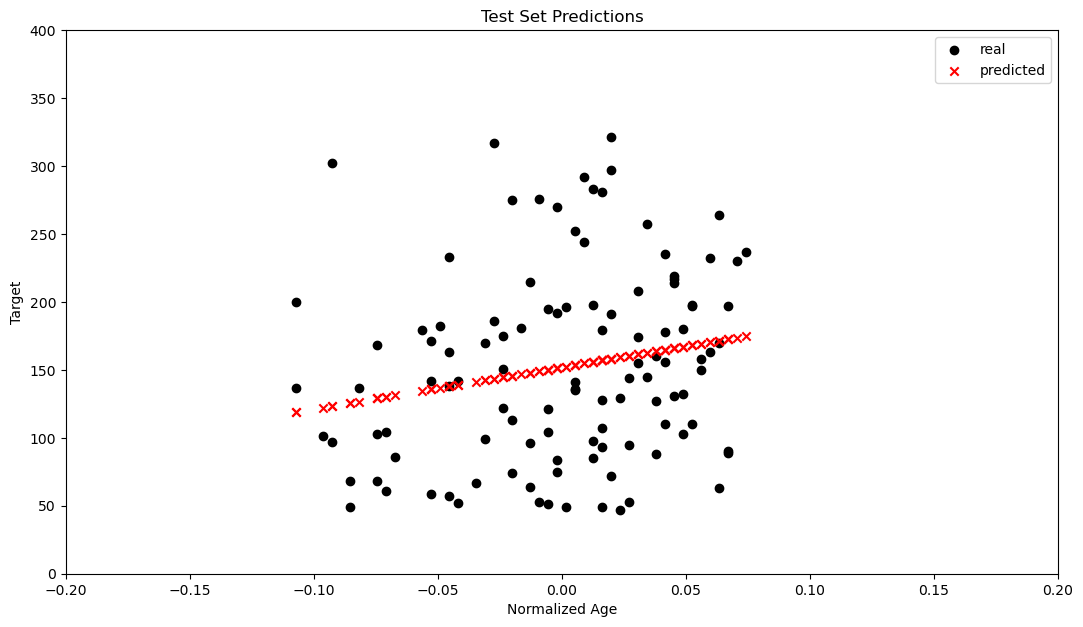

Test Set Evaluation:
correlation = (0.18944559051423338, 0.04643569727970947)
mean squared error = 4787.568777185871
r2 = 0.03562250041105597


In [9]:
run(x_train[:,:1], x_test[:,:1], y_train, y_test, linearRegressionModel) # use only the first feature

Training Set Evaluation:
r2 = 0.555437148935302


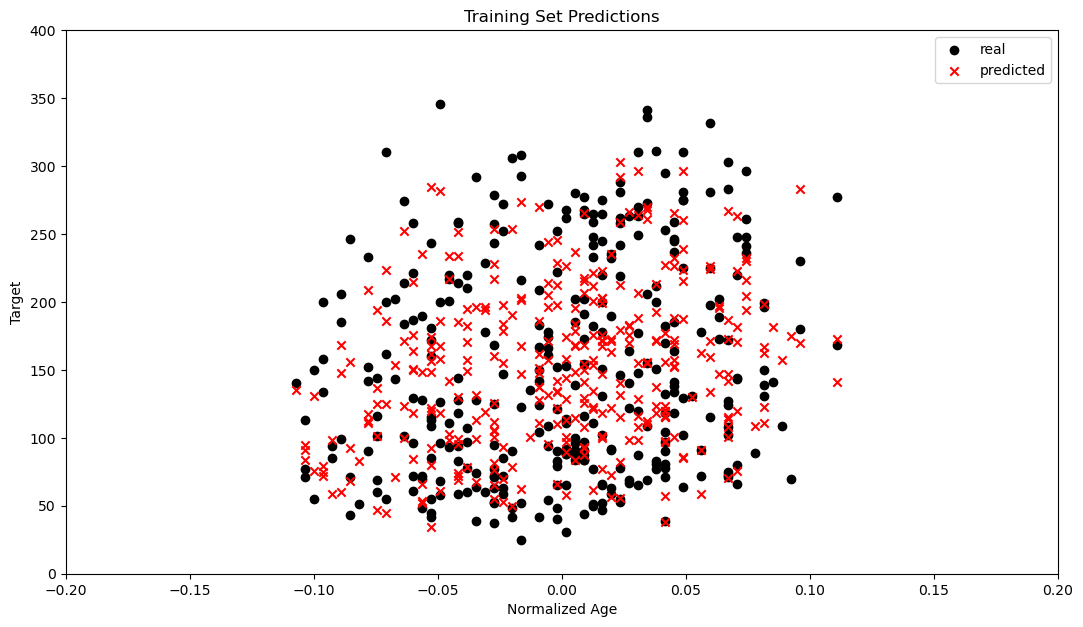

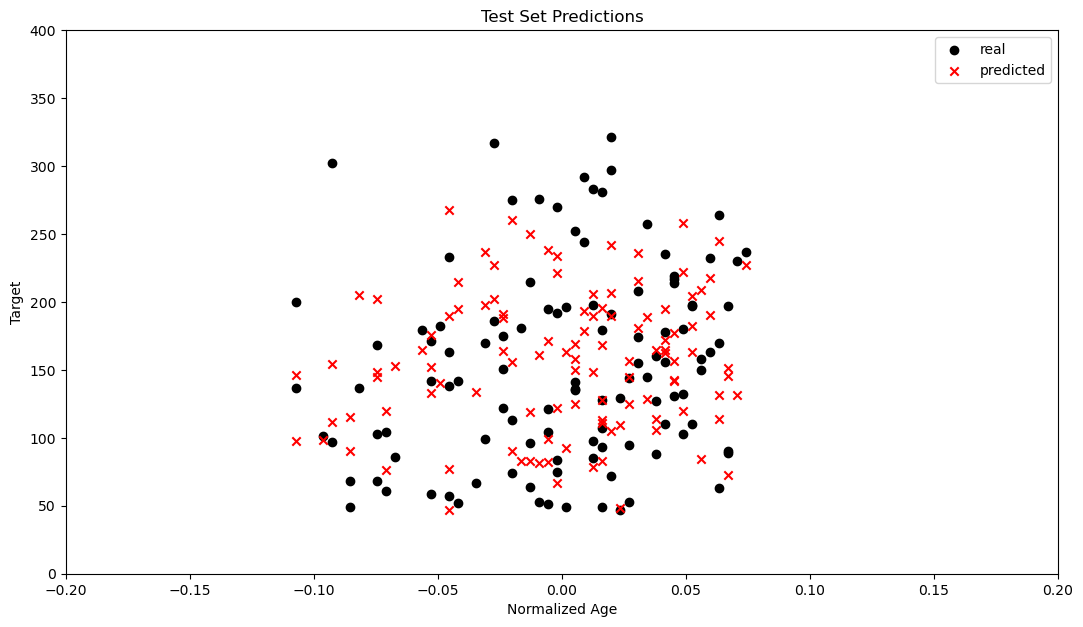

Test Set Evaluation:
correlation = (0.6127135234626391, 8.878063664858575e-13)
mean squared error = 3180.1988368427274
r2 = 0.35940090989715534


In [10]:
run(x_train, x_test, y_train, y_test, linearRegressionModel) # use all of the features